In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn import linear_model

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
# Read CSV data
raw_price = pd.read_csv("rice_data.csv")#df
raw_supply = pd.read_csv("supp_dem.csv")#df2

# Pivot years to column
price_data = raw_price.melt(id_vars=["REGION", "PROVINCE"], 
        var_name="YEAR", 
        value_name="price")

# Convert data types
price_data['YEAR'] = price_data['YEAR'].astype(int)
raw_supply.astype(str)

# Lower capital letters
raw_supply = raw_supply.applymap(lambda s:s.lower() if type(s) == str else s)
price_data = price_data.applymap(lambda s:s.lower() if type(s) == str else s)

# Merge price and supply data
rice_data = price_data.merge(raw_supply, how='outer', left_on=['REGION', 'YEAR'], right_on=['Region', 'YEAR'])

# Filter data ( we don't want to use NCR )
rice_data = rice_data[rice_data.REGION != 'ncr']

# Drop extra column
rice_data.drop('Region',axis=1)

,REGION,PROVINCE,YEAR,price,FOOD USE,TOTAL USE,PRODUCTION,SURPLUS/(DEFICIT),POPULATION (number of persons)
3,ilocos region,ilocos region(ave),1990,5.16,409120.0,460189.00,554390.00,94201.00,3558247.0
4,ilocos region,abra,1990,NaN,409120.0,460189.00,554390.00,94201.00,3558247.0
5,ilocos region,ilocos norte,1990,5.09,409120.0,460189.00,554390.00,94201.00,3558247.0
6,ilocos region,ilocos sur,1990,5.10,409120.0,460189.00,554390.00,94201.00,3558247.0
7,ilocos region,la union,1990,5.22,409120.0,460189.00,554390.00,94201.00,3558247.0
...,...,...,...,...,...,...,...,...,...
703,NaN,NaN,1985,NaN,206405.0,268400.70,684195.18,415794.48,2124261.0
704,NaN,NaN,1970,NaN,334981.0,397517.03,641204.55,243687.52,3635532.0
705,NaN,NaN,1975,NaN,426031.0,491813.12,666768.75,174955.63,4221846.0
706,NaN,NaN,1980,NaN,494994.0,573082.16,844041.25,270959.09,4826671.0


In [8]:
rice_data = pd.read_csv("farm_price_cl.csv")
rice_data.head(20)

,Date,Location,FP_Palay_Low,FP_Palay_High,FP_Palay_Prevailing
0,31-Jan-18,III. CENTRAL LUZON,11.60,20.57,NaN
1,7-Feb-18,III. CENTRAL LUZON,11.75,21.07,NaN
2,14-Feb-18,III. CENTRAL LUZON,11.75,20.98,NaN
3,21-Feb-18,III. CENTRAL LUZON,11.75,20.79,NaN
4,28-Feb-18,III. CENTRAL LUZON,11.75,20.81,NaN
5,7-Mar-18,III. CENTRAL LUZON,11.85,21.14,NaN
6,14-Mar-18,III. CENTRAL LUZON,12.00,21.07,NaN
7,21-Mar-18,III. CENTRAL LUZON,12.00,21.21,NaN
8,28-Mar-18,III. CENTRAL LUZON,12.00,21.39,NaN
9,4-Apr-18,III. CENTRAL LUZON,12.00,21.26,NaN


In [16]:
rice_data['ave'] = (rice_data['FP_Palay_Low'] + rice_data['FP_Palay_High']) / 2
rice_data.head()

,Date,Location,FP_Palay_Low,FP_Palay_High,FP_Palay_Prevailing,ave
0,31-Jan-18,III. CENTRAL LUZON,11.60,20.57,NaN,16.085
1,7-Feb-18,III. CENTRAL LUZON,11.75,21.07,NaN,16.410
2,14-Feb-18,III. CENTRAL LUZON,11.75,20.98,NaN,16.365
3,21-Feb-18,III. CENTRAL LUZON,11.75,20.79,NaN,16.270
4,28-Feb-18,III. CENTRAL LUZON,11.75,20.81,NaN,16.280


In [3]:
fig = plt.figure(figsize = (3,2))
# Check by plot
rice_data.plot(kind='line',x='Date',y='ave', figsize=(20,10))



KeyError: 'Date'

<Figure size 216x144 with 0 Axes>

<Figure size 216x144 with 0 Axes>

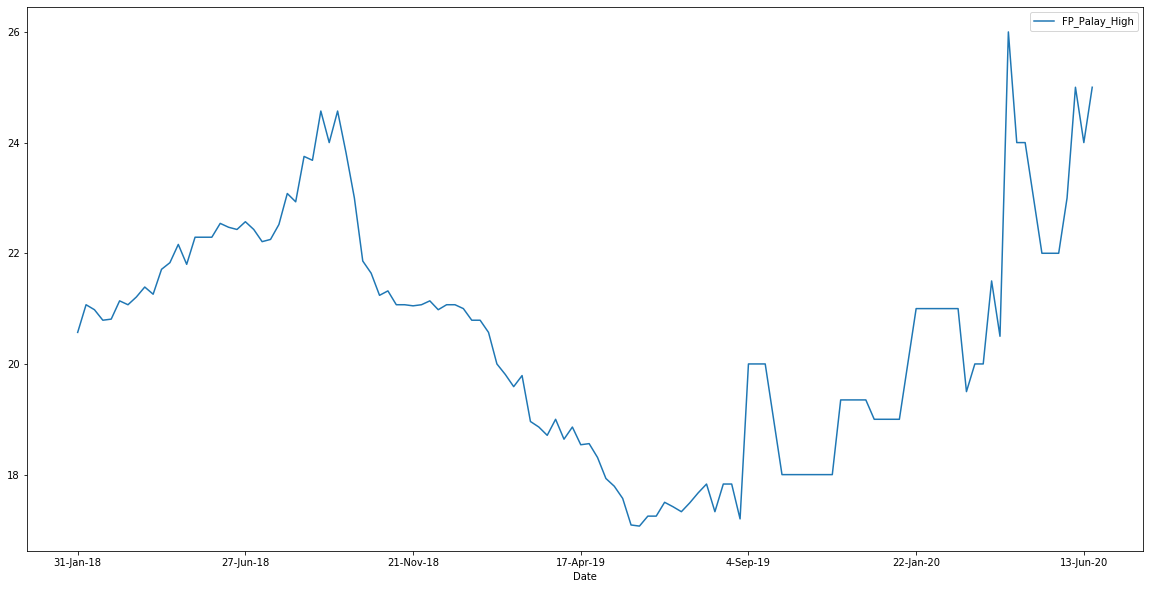

In [15]:
# Print to a csv file to check
rice_data.to_csv('see.csv')

In [4]:
# Filter by region
ilocos_region = rice_data[rice_data.REGION == 'ilocos region']

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

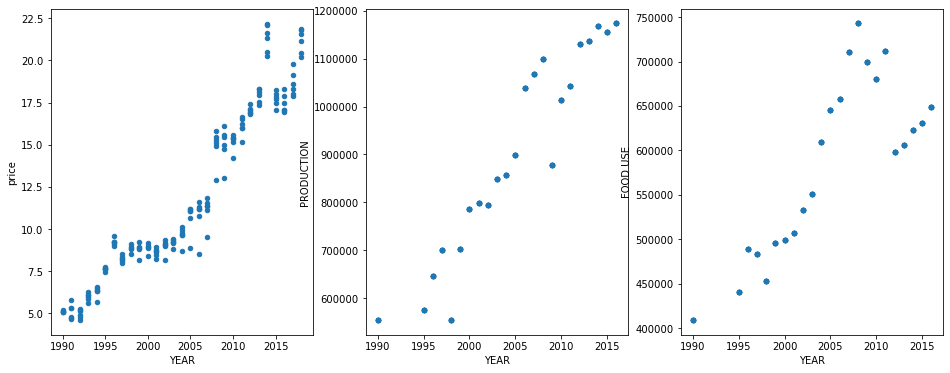

In [5]:
# Price, production, food use plot
fig, axes = plt.subplots(nrows=1,ncols = 3,figsize =(16,6))
ilocos_region.plot(kind='scatter',x='YEAR',y='price',ax=axes[0])
ilocos_region.plot(kind='scatter',x='YEAR',y='PRODUCTION',ax=axes[1])
ilocos_region.plot(kind='scatter',x='YEAR',y='FOOD USE',ax=axes[2])
plt.tight_layout

# Linear Regression Model

In [6]:
# Start of Modeling
# convert string to integer
rice_data['REGION'] = rice_data['REGION'].replace(['ilocos region','cagayan valley','central luzon'],['1','2','3'])

# Fill blank values with 0
rice_data = rice_data.fillna(0)

# Name x and y variables
rice_data = rice_data[["REGION", "YEAR", "price","TOTAL USE","PRODUCTION",]]

predict = "price"

# Convert rice data to numpy array
X = np.array(rice_data.drop([predict], 1))
Y = np.array(rice_data[predict])

# Split data into train and test
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.1)



In [7]:
# Linear Regression
linear = linear_model.LinearRegression()

# Fit model
linear.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# score
acc = linear.score(x_test,y_test)
print(acc)
print('==================================')

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print('==================================')
# predict test data
predictions = linear.predict(x_test)

# List predictions
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

0.8842490095728477
Coefficient: 
 [-8.61948066e-02  5.50688524e-01 -8.12961838e-08  2.44798458e-07]
Intercept: 
 -1092.036398275942
18.30415459645269 ['3' 2016 1486446.24 2172874.03] 17.81
16.665242938720212 ['2' 2013 584802.05 1575071.55] 18.02
13.303140041739198 ['1' 2007 829743.0 1067495.65] 11.38
19.16684745092516 ['1' 2018 0.0 0.0] 20.18
15.499851932646152 ['1' 2011 826779.41 1041829.1] 16.54
11.060665890536711 ['1' 2003 656911.11 847843.0] 9.37
3.8235783772440755 ['2' 1990 299289.0 761996.0] 4.65
12.69997737011363 ['3' 2006 1381127.0 1740461.0] 11.64
12.737202116078151 ['2' 2006 566666.0 1269940.75] 10.52
12.131461593061886 ['3' 2005 1342488.0 1654805.0] 11.16
18.301128224382865 ['2' 2016 606632.99 1516225.13] 17.17
19.080652644312295 ['2' 2018 0.0 0.0] 19.9
17.735912644472137 ['1' 2015 758251.44 1155128.65] 18.24
16.115293085292024 ['2' 2012 580111.93 1576531.45] 16.37
10.498771660101738 ['1' 2002 634093.0 794490.0] 8.15
13.841737211706231 ['3' 2008 1543438.0 1959327.0] 15.19
9.

# LSTM Model trial

In [19]:
rice_data = rice_data.interpolate(method='nearest')
# Create a new dataframe with only the 'close' column
data = rice_data.filter(['ave'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number ofrows to train the model on
training_data_len  = math.ceil(len(dataset) * .8)
print(dataset)

[[16.085]
 [16.41 ]
 [16.365]
 [16.27 ]
 [16.28 ]
 [16.495]
 [16.535]
 [16.605]
 [16.695]
 [16.63 ]
 [16.98 ]
 [17.04 ]
 [17.33 ]
 [17.275]
 [17.52 ]
 [17.645]
 [17.77 ]
 [18.02 ]
 [18.11 ]
 [18.215]
 [18.41 ]
 [18.34 ]
 [18.23 ]
 [18.25 ]
 [18.385]
 [18.79 ]
 [18.715]
 [18.375]
 [18.34 ]
 [19.285]
 [19.25 ]
 [19.785]
 [19.41 ]
 [18.75 ]
 [18.18 ]
 [18.07 ]
 [17.87 ]
 [17.91 ]
 [17.785]
 [17.785]
 [17.775]
 [17.785]
 [17.82 ]
 [17.74 ]
 [17.785]
 [17.785]
 [17.625]
 [17.52 ]
 [17.895]
 [17.785]
 [17.5  ]
 [17.405]
 [17.295]
 [17.395]
 [16.855]
 [16.805]
 [16.68 ]
 [16.7  ]
 [16.02 ]
 [16.055]
 [15.77 ]
 [15.78 ]
 [15.53 ]
 [15.34 ]
 [15.27 ]
 [15.16 ]
 [14.795]
 [14.785]
 [14.875]
 [14.875]
 [14.8  ]
 [14.71 ]
 [14.615]
 [14.745]
 [14.335]
 [14.415]
 [14.415]
 [14.415]
 [14.415]
 [14.1  ]
 [16.5  ]
 [15.   ]
 [15.   ]
 [14.5  ]
 [14.5  ]
 [14.5  ]
 [14.5  ]
 [14.5  ]
 [14.5  ]
 [14.5  ]
 [14.5  ]
 [15.175]
 [15.175]
 [15.175]
 [15.175]
 [16.   ]
 [16.   ]
 [15.   ]
 [15.   ]
 [15.5  ]


In [20]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.26824324]
 [0.31216216]
 [0.30608108]
 [0.29324324]
 [0.29459459]
 [0.32364865]
 [0.32905405]
 [0.33851351]
 [0.35067568]
 [0.34189189]
 [0.38918919]
 [0.3972973 ]
 [0.43648649]
 [0.42905405]
 [0.46216216]
 [0.47905405]
 [0.49594595]
 [0.52972973]
 [0.54189189]
 [0.55608108]
 [0.58243243]
 [0.57297297]
 [0.55810811]
 [0.56081081]
 [0.57905405]
 [0.63378378]
 [0.62364865]
 [0.5777027 ]
 [0.57297297]
 [0.70067568]
 [0.69594595]
 [0.76824324]
 [0.71756757]
 [0.62837838]
 [0.55135135]
 [0.53648649]
 [0.50945946]
 [0.51486486]
 [0.49797297]
 [0.49797297]
 [0.49662162]
 [0.49797297]
 [0.5027027 ]
 [0.49189189]
 [0.49797297]
 [0.49797297]
 [0.47635135]
 [0.46216216]
 [0.51283784]
 [0.49797297]
 [0.45945946]
 [0.44662162]
 [0.43175676]
 [0.44527027]
 [0.3722973 ]
 [0.36554054]
 [0.34864865]
 [0.35135135]
 [0.25945946]
 [0.26418919]
 [0.22567568]
 [0.22702703]
 [0.19324324]
 [0.16756757]
 [0.15810811]
 [0.14324324]
 [0.09391892]
 [0.09256757]
 [0.10472973]
 [0.10472973]
 [0.09459459]
 [0.08

In [21]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Sprint the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        #print(y_train)
       # print()

[array([0.26824324, 0.31216216, 0.30608108, 0.29324324, 0.29459459,
       0.32364865, 0.32905405, 0.33851351, 0.35067568, 0.34189189,
       0.38918919, 0.3972973 , 0.43648649, 0.42905405, 0.46216216,
       0.47905405, 0.49594595, 0.52972973, 0.54189189, 0.55608108,
       0.58243243, 0.57297297, 0.55810811, 0.56081081, 0.57905405,
       0.63378378, 0.62364865, 0.5777027 , 0.57297297, 0.70067568,
       0.69594595, 0.76824324, 0.71756757, 0.62837838, 0.55135135,
       0.53648649, 0.50945946, 0.51486486, 0.49797297, 0.49797297,
       0.49662162, 0.49797297, 0.5027027 , 0.49189189, 0.49797297,
       0.49797297, 0.47635135, 0.46216216, 0.51283784, 0.49797297,
       0.45945946, 0.44662162, 0.43175676, 0.44527027, 0.3722973 ,
       0.36554054, 0.34864865, 0.35135135, 0.25945946, 0.26418919])]
[array([0.26824324, 0.31216216, 0.30608108, 0.29324324, 0.29459459,
       0.32364865, 0.32905405, 0.33851351, 0.35067568, 0.34189189,
       0.38918919, 0.3972973 , 0.43648649, 0.42905405, 0.4

In [22]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)

[[0.26824324 0.31216216 0.30608108 ... 0.35135135 0.25945946 0.26418919]
 [0.31216216 0.30608108 0.29324324 ... 0.25945946 0.26418919 0.22567568]
 [0.30608108 0.29324324 0.29459459 ... 0.26418919 0.22567568 0.22702703]
 ...
 [0.53648649 0.50945946 0.51486486 ... 0.14527027 0.14527027 0.14527027]
 [0.50945946 0.51486486 0.49797297 ... 0.14527027 0.14527027 0.25675676]
 [0.51486486 0.49797297 0.49797297 ... 0.14527027 0.25675676 0.25675676]]


In [23]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.26824324],
        [0.31216216],
        [0.30608108],
        ...,
        [0.35135135],
        [0.25945946],
        [0.26418919]],

       [[0.31216216],
        [0.30608108],
        [0.29324324],
        ...,
        [0.25945946],
        [0.26418919],
        [0.22567568]],

       [[0.30608108],
        [0.29324324],
        [0.29459459],
        ...,
        [0.26418919],
        [0.22567568],
        [0.22702703]],

       ...,

       [[0.53648649],
        [0.50945946],
        [0.51486486],
        ...,
        [0.14527027],
        [0.14527027],
        [0.14527027]],

       [[0.50945946],
        [0.51486486],
        [0.49797297],
        ...,
        [0.14527027],
        [0.14527027],
        [0.25675676]],

       [[0.51486486],
        [0.49797297],
        [0.49797297],
        ...,
        [0.14527027],
        [0.25675676],
        [0.25675676]]])

In [24]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
38/38 [==============================] - 3s 92ms/step - loss: 0.0066


In [27]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data ets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [28]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [29]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [31]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

2.2984779511258426


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


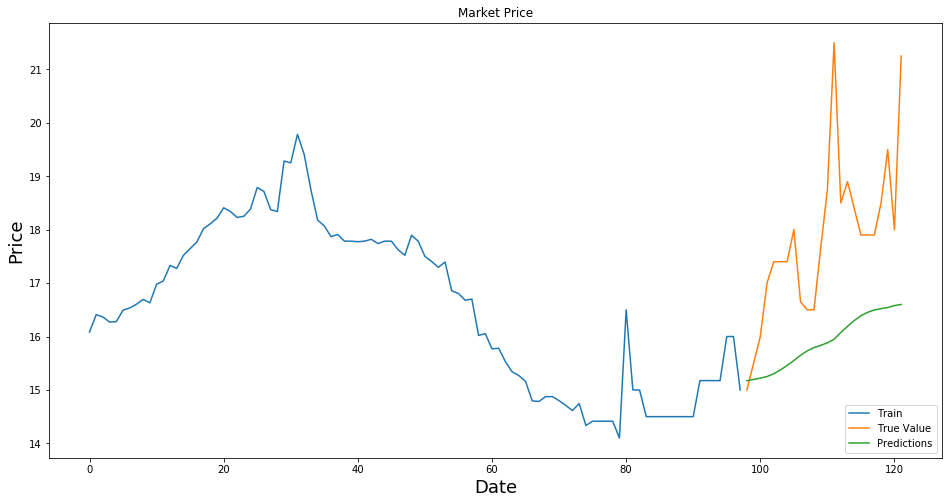

In [34]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Market Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize = 18)
plt.plot(train['ave'])
plt.plot(valid[['ave', 'Predictions']])
plt.legend(['Train', 'True Value', 'Predictions'], loc = 'lower right')
plt.show()

In [26]:
#Show the valid and predicted prices
valid

,price,Predictions
557,18.30,16.946522
558,18.30,17.073996
559,17.55,17.208267
560,18.15,17.328157
579,21.34,17.445038
580,20.28,17.625002
581,22.19,17.831821
582,21.65,18.093513
583,20.48,18.380798
584,22.11,18.653345


In [27]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [35]:
ilocos_region = rice_data[rice_data.REGION == 'ilocos region']
ilocos_region = ilocos_region.interpolate(method='nearest')
ilocos_region = ilocos_region['price'].values
ilocos_region = ilocos_region.reshape(-1, 1)
print(ilocos_region.shape)
# To see the first five items
ilocos_region[:5] 

(174, 1)


array([[5.16],
       [5.16],
       [5.09],
       [5.1 ],
       [5.22]])

In [37]:
# Split them into training and test sets

dataset_train = np.array(ilocos_region[:int(ilocos_region.shape[0]*0.8)])
dataset_test = np.array(ilocos_region[int(ilocos_region.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(139, 1)
(85, 1)


In [38]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.04129129],
       [0.04129129],
       [0.03603604],
       [0.03678679],
       [0.0457958 ]])

In [39]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.38663664],
       [0.45495495],
       [0.31831832],
       [0.49249249],
       [0.48573574]])

In [40]:

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [41]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.04129129, 0.04129129, 0.03603604, 0.03678679, 0.0457958 ,
        0.03528529, 0.05105105, 0.08858859, 0.00225225, 0.01426426,
        0.0533033 , 0.00975976, 0.0457958 , 0.04129129, 0.        ,
        0.02327327, 0.04954955, 0.01276276, 0.10285285, 0.07657658,
        0.09309309, 0.12237237, 0.10960961, 0.11186186, 0.14489489,
        0.08033033, 0.12762763, 0.13438438, 0.14039039, 0.13063063,
        0.22672673, 0.23048048, 0.21396396, 0.22822823, 0.23498498,
        0.22747748, 0.3475976 , 0.32957958, 0.34534535, 0.34684685,
        0.37537538, 0.33933934, 0.27252252, 0.2545045 , 0.27927928,
        0.26351351, 0.27252252, 0.29429429, 0.31831832, 0.31831832]])

In [42]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.38663664, 0.45495495, 0.31831832, 0.49249249, 0.48573574,
        0.48498498, 0.49249249, 0.46096096, 0.29204204, 0.5015015 ,
        0.4954955 , 0.49174174, 0.52477477, 0.48873874, 0.36936937,
        0.54129129, 0.50525526, 0.50825826, 0.52027027, 0.77327327,
        0.62462462, 0.81306306, 0.79954955, 0.84084084, 0.78678679,
        0.78003003, 0.63288288, 0.86411411, 0.76126126, 0.81606607,
        0.82507508, 0.79354354, 0.72072072, 0.80555556, 0.80930931,
        0.82207207, 0.80930931, 0.87312312, 0.79129129, 0.90315315,
        0.85435435, 0.85435435, 0.89564565, 0.93393393, 0.92717718,
        0.93993994, 0.92042042, 0.91741742, 0.96246246, 1.        ]])

In [43]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [44]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [45]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [47]:
import os
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

Epoch 1/50
89/89 [==============================] - 2s 22ms/step - loss: 0.2191
Epoch 2/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 3/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0391
Epoch 4/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0644
Epoch 5/50
89/89 [==============================] - 0s 4ms/step - loss: 0.0266
Epoch 6/50
89/89 [==============================] - 0s 4ms/step - loss: 0.0284
Epoch 7/50
89/89 [==============================] - 0s 4ms/step - loss: 0.0204
Epoch 8/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 9/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0201
Epoch 10/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 11/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0145
Epoch 12/50
89/89 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 13/50
89/89 [=============================

In [48]:
model = load_model('stock_prediction.h5')

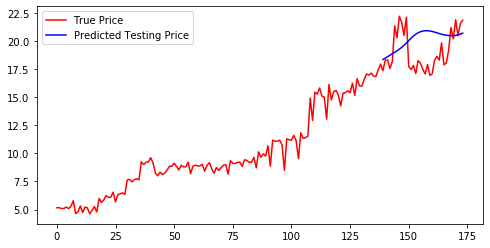

In [50]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(ilocos_region, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

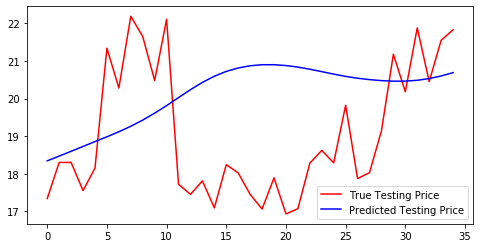

In [51]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()